In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import random

In [ ]:
centroids = [(-5,-5),(5,5), (-2.5, -2.5)]
cluster_std = [1,1,1]

In [ ]:
X,y = make_blobs(n_samples=100,centers=centroids,cluster_std=cluster_std, n_features=2, random_state=2)

In [ ]:
class KMeans:
  def __init__(self, n_clusters, max_iter):
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.centroids = None
  def fit_predict(self, X):
    random_index = random.sample(range(0,X.shape[0]), self.n_clusters)
    self.centroids = X[random_index]
    for i in range(self.max_iter):
      cluster_group = self.assign_clusters(X)
      old_centroids = self.centroids
      self.centroids = self.move_centroids(X, cluster_group)
      if(self.centroids == old_centroids).all():
        break
    return cluster_group
  def assign_clusters(self, X):
    cluster_group = []
    distances = []
    for row in X:
      for centroid in self.centroids:
        distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
      min_distance = min(distances)
      index_pos = distances.index(min_distance)
      cluster_group.append(index_pos)
      distances.clear()
    return np.array(cluster_group)
  def move_centroids(self, X, cluster_group):
    new_centroids = []
    cluster_type = np.unique(cluster_group)
    for type in cluster_type:
      new_centroids.append(np.mean(X[cluster_group == type], axis=0))
    return np.array(new_centroids)


In [ ]:
km = KMeans(n_clusters=3, max_iter=100)
y_means = km.fit_predict(X)


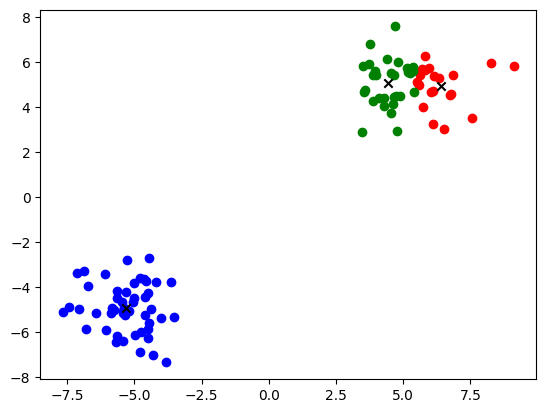

In [ ]:
plt.scatter(X[y_means == 0,0], X[y_means == 0,1], color='red')
plt.scatter(X[y_means == 1,0], X[y_means == 1,1], color='blue')
plt.scatter(X[y_means == 2,0], X[y_means == 2,1], color='green')

plt.scatter(km.centroids[:,0], km.centroids[:,1], color='black', marker='x')
plt.show()